# Data Description

# Imports

In [3]:
# Supress Notebook Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
df = pd.read_csv('data/online_shoppers_intention.csv', delimiter=',')
df.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


### Check for null values

In [5]:
# Show counter for null values
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
# Rows with negative duration
print('Problematic Rows Count:',df[df['Informational_Duration'] < 0].count()[1])

Problematic Rows Count: 33


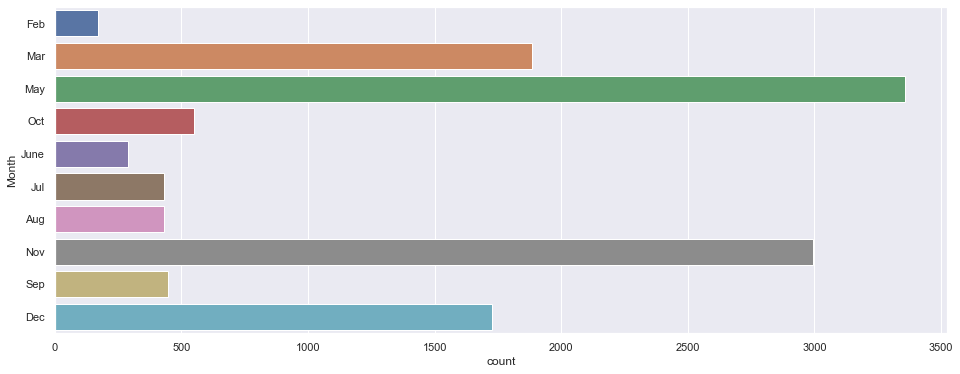

In [7]:
plt.figure(figsize=(16,6))
sns.countplot(y='Month',data=df)

### Correlation Heatmap

In [ ]:
sns.set(font_scale=1.25)
fig, (axis1) = plt.subplots(1,1,figsize=(15,8))
sns.heatmap(df.corr(),ax=axis1)
axis1.set_title('Correlation Heatmap',)

# Exploratory Analysis

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(y='Month',data=df)

In [ ]:
sns.distplot(df['ExitRates'])

In [ ]:
sns.distplot(df['BounceRates'])

## Aggregate by Month

In [ ]:
sum_monthly_data = df.groupby('Month', as_index=False).sum()
avg_monthly_data = df.groupby('Month', as_index=False).mean()

In [ ]:
avg_monthly_data

In [ ]:
sns.barplot(x='Month',y='Administrative', data=avg_monthly_data)

In [ ]:
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(16,5))
sns.barplot(x='Month', y='Administrative', data=avg_monthly_data,ax=axis1)
sns.barplot(x='Month', y='Informational', data=avg_monthly_data,ax=axis2)
sns.barplot(x='Month', y='ProductRelated', data=avg_monthly_data,ax=axis3)

In [ ]:
avg_monthly_data

In [ ]:
sns.barplot(x='Month', y='PageValues', data=avg_monthly_data)

In [ ]:
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(16,5))
sns.countplot(x='Weekend',hue='Revenue', data=df, ax=axis1)
sns.countplot(x='Region', data=df, ax=axis2)
sns.countplot(x='OperatingSystems', data=df, ax=axis3)

In [ ]:
df['SpecialDay'].value_counts()

In [ ]:
sns.countplot(x='SpecialDay', data=df[df['SpecialDay'] != 0])

In [ ]:
sns.countplot(x='TrafficType', data=df)

## Aggregate by Weekend

In [ ]:
avg_weekend_data = df.groupby('Weekend', as_index=False).mean()

In [ ]:
sns.barplot(x='Weekend', y='PageValues', data=avg_weekend_data)

In [ ]:
sns.barplot(x='Weekend', y='Informational_Duration', data=avg_weekend_data)

## Cleaning Data

In [ ]:
Try Oversampling / Undersampling

https://www.kaggle.com/saurav9786/ensemble-techniques

label_binarize - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html

In [ ]:
# Take rows without null & negative value
df = df[((df['Administrative_Duration'] >= 0) & (df['Informational_Duration'] >= 0) & (df['ProductRelated_Duration'] >= 0))]

In [26]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [27]:
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [28]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [29]:
pd.get_dummies(df, columns=['Weekend','VisitorType'], drop_first=True)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue,Weekend_True,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,False,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,False,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,False,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,False,1,0,1
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,False,1,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,False,1,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,False,1,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,False,0,0,1


In [30]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [31]:
df['Month'].value_counts()

May     3357
Nov     2995
Mar     1884
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      431
June     288
Feb      171
Name: Month, dtype: int64

In [32]:
df['Month']= df['Month'].astype('category').cat.codes
df['Revenue'] = df['Revenue'].astype('category').cat.codes

In [33]:
df=pd.get_dummies(df, columns=['Weekend','VisitorType','OperatingSystems','Browser','Region'], drop_first=True)

In [131]:
from sklearn.model_selection import train_test_split

X = df.drop(labels=['Revenue'], axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [132]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
df['Revenue'].value_counts()

0    10375
1     1908
Name: Revenue, dtype: int64

## Decision Tree Classifier

Hence the Y variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure.

FN is very critical for this business case because a false negative is a customer who will potentially subscribe for a loan but who has been classified as 'will not subscribe'. Hence the most relevant model performance measure is recall

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [99]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

# print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3105
           1       0.67      0.04      0.07       580

    accuracy                           0.85      3685
   macro avg       0.76      0.52      0.49      3685
weighted avg       0.82      0.85      0.78      3685



In [134]:
from sklearn.ensemble import RandomForestClassifier

ran_forest = RandomForestClassifier(n_estimators=500, min_samples_split=3, random_state=102)
ran_forest.fit(X_train, y_train)

predictions = ran_forest.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3105
           1       0.80      0.53      0.64       580

    accuracy                           0.91      3685
   macro avg       0.86      0.75      0.79      3685
weighted avg       0.90      0.91      0.90      3685



In [137]:
def accuracy(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    result = confusion_matrix(y_pred,y_test)
    acc = ((result[0][0]+result[1][1])/(len(y_test)))*100
    return acc

In [141]:
from sklearn.metrics import precision_score, accuracy_score
print('precision on the evaluation set: ', precision_score(y_test, predictions))
print('accuracy on the evaluation set: ', accuracy_score(y_test, predictions))

precision on the evaluation set:  0.7969151670951157
accuracy on the evaluation set:  0.905291723202171


In [142]:
print(confusion_matrix(y_test, predictions))

[[3026   79]
 [ 270  310]]


In [143]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [145]:
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, predictions ))
print(round(accuracy_score(y_test, predictions),2)*100)
#GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[3026   79]
 [ 270  310]]
91.0


In [146]:
from sklearn.metrics import precision_score, accuracy_score
print('precision on the evaluation set: ', precision_score(y_test, predictions))
print('accuracy on the evaluation set: ', accuracy_score(y_test, predictions))

precision on the evaluation set:  0.7969151670951157
accuracy on the evaluation set:  0.905291723202171


In [147]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3105
           1       0.80      0.53      0.64       580

    accuracy                           0.91      3685
   macro avg       0.86      0.75      0.79      3685
weighted avg       0.90      0.91      0.90      3685



In [149]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, predictions ))
print(round(accuracy_score(y_test, predictions),2)*100)
#GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[3026   79]
 [ 270  310]]
91.0


In [150]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3105
           1       0.80      0.53      0.64       580

    accuracy                           0.91      3685
   macro avg       0.86      0.75      0.79      3685
weighted avg       0.90      0.91      0.90      3685



In [129]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

In [130]:
bagging.fit(X_train, y_train)

predictions = bagging.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3105
           1       0.67      0.04      0.07       580

    accuracy                           0.85      3685
   macro avg       0.76      0.52      0.49      3685
weighted avg       0.82      0.85      0.78      3685



## SVC

In [102]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [104]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[3054   51]
 [ 363  217]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3105
           1       0.81      0.37      0.51       580

    accuracy                           0.89      3685
   macro avg       0.85      0.68      0.72      3685
weighted avg       0.88      0.89      0.87      3685



In [105]:
# Type of penalty - Lasso(l1) or Ridge(l2)
penalties = ['l1','l2']
C_values = np.linspace(0.2, 20, 41)

In [106]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Cross-Validation
cross_valid = StratifiedKFold(n_splits=10)

# Hyperparameter Tuning
params = {'penalty': penalties, 'C': C_values}

logmodel2 = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=logmodel2, param_grid=params, scoring='accuracy', n_jobs=-1, cv=cross_valid)
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='de...
             param_grid={'C': array([ 0.2  ,  0.695,  1.19 ,  1.685,  2.18 ,  2.675,  3.17 ,  3.665,
        4.16 ,  4.655,  5.15 ,  5.645,  6.14 ,  6.635,  7.13 ,  7.625,
        8.12 ,  8.615,  9.11 ,  9.605, 10.1  , 10.595, 11.09 , 11.585,
       12.08 , 12.575, 13.07 , 13.565, 14.06 , 14.5

In [107]:
print (grid.best_params_)
print (grid.best_score_)
print(grid.best_estimator_)

{'C': 19.505, 'penalty': 'l1'}
0.883085941537703
LogisticRegression(C=19.505, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


## Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

In [110]:
logmodel=LogisticRegression(solver='liblinear', C=19.1, penalty='l1')

In [111]:
logmodel.fit(X, y)

LogisticRegression(C=19.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
predictions = logmodel.predict(X_test)

In [113]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(logmodel, X, y, cv=10)
score.mean()

0.8828417081231794

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1293 1812]
 [  49  531]]
              precision    recall  f1-score   support

           0       0.96      0.42      0.58      3105
           1       0.23      0.92      0.36       580

    accuracy                           0.49      3685
   macro avg       0.60      0.67      0.47      3685
weighted avg       0.85      0.49      0.55      3685



## NN with Scaler

In [119]:
from sklearn.model_selection import train_test_split

X = df.drop(labels=['Revenue'], axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [120]:
import keras as K

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scal = sc.fit_transform(df.drop(labels=['Revenue'], axis=1))
X_scal

array([[-0.6989074 , -0.45823768, -0.39724702, ..., -0.25645675,
        -0.19138329, -0.20770713],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.25645675,
        -0.19138329, -0.20770713],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.25645675,
        -0.19138329, -0.20770713],
       ...,
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.25645675,
        -0.19138329, -0.20770713],
       [ 0.50410263, -0.03460371, -0.39724702, ..., -0.25645675,
        -0.19138329, -0.20770713],
       [-0.6989074 , -0.45823768, -0.39724702, ..., -0.25645675,
        -0.19138329, -0.20770713]])

In [122]:

X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.3, random_state=3)

In [76]:
from keras import Sequential
from keras.layers import Dense

In [77]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal', input_dim=X_scal.shape[1]))
#Second  Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [78]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [79]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
8598/8598 [==============================] - 1s 98us/step - loss: 0.3565 - accuracy: 0.8732
Epoch 2/100
8598/8598 [==============================] - 1s 75us/step - loss: 0.2983 - accuracy: 0.8856
Epoch 3/100
8598/8598 [==============================] - 2s 210us/step - loss: 0.2895 - accuracy: 0.8889
Epoch 4/100
8598/8598 [==============================] - 1s 141us/step - loss: 0.2801 - accuracy: 0.8910
Epoch 5/100
8598/8598 [==============================] - 1s 125us/step - loss: 0.2739 - accuracy: 0.8911
Epoch 6/100
8598/8598 [==============================] - 1s 62us/step - loss: 0.2681 - accuracy: 0.8933
Epoch 7/100
8598/8598 [==============================] - 1s 78us/step - loss: 0.2634 - accuracy: 0.8923
Epoch 8/100
8598/8598 [==============================] - 1s 99us/step - loss: 0.2607 - accuracy: 0.8959
Epoch 9/100
8598/8598 [==============================] - 1s 111us/step - loss: 0.2592 - accuracy: 0.8937
Epoch 10/100
8598/8598 [==============================] - 1s

In [80]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

8598/8598 [==============================] - 0s 8us/step


[0.19400222773162618, 0.9167248010635376]

In [81]:
predictions=classifier.predict(X_test)
predictions =(predictions>0.5)
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3105
           1       0.71      0.57      0.63       580

    accuracy                           0.89      3685
   macro avg       0.81      0.76      0.78      3685
weighted avg       0.89      0.89      0.89      3685



In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3105
           1       0.70      0.61      0.65       580

    accuracy                           0.90      3685
   macro avg       0.81      0.78      0.80      3685
weighted avg       0.89      0.90      0.89      3685



## NN with MinMax

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scal = scaler.fit_transform(df.drop(labels=['Revenue'], axis=1))
X_scal
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.3, random_state=3)

In [70]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(12, activation='relu', kernel_initializer='random_normal', input_dim=X_scal.shape[1]))
#Second  Hidden Layer
classifier.add(Dense(12, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
8598/8598 [==============================] - 1s 110us/step - loss: 0.4504 - accuracy: 0.8425
Epoch 2/100
8598/8598 [==============================] - 1s 120us/step - loss: 0.4243 - accuracy: 0.8455
Epoch 3/100
8598/8598 [==============================] - 1s 148us/step - loss: 0.4158 - accuracy: 0.8455
Epoch 4/100
8598/8598 [==============================] - 1s 146us/step - loss: 0.4046 - accuracy: 0.8455
Epoch 5/100
8598/8598 [==============================] - 1s 141us/step - loss: 0.3926 - accuracy: 0.8455
Epoch 6/100
8598/8598 [==============================] - 1s 69us/step - loss: 0.3806 - accuracy: 0.8455
Epoch 7/100
8598/8598 [==============================] - 1s 90us/step - loss: 0.3697 - accuracy: 0.8455
Epoch 8/100
8598/8598 [==============================] - 1s 110us/step - loss: 0.3601 - accuracy: 0.8455
Epoch 9/100
8598/8598 [==============================] - 0s 52us/step - loss: 0.3517 - accuracy: 0.8476
Epoch 10/100
8598/8598 [==============================] - 

In [71]:
predictions=classifier.predict(X_test)
predictions =(predictions>0.5)
predictions

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3105
           1       0.72      0.54      0.62       580

    accuracy                           0.89      3685
   macro avg       0.82      0.75      0.78      3685
weighted avg       0.89      0.89      0.89      3685

